# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ As we can see from the histogram, the distribution is not normal. Hence, the standard deviation is not the best measure of the data, though the mean is still relevant.

In [4]:
#calculate mean and std
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

#print results
print(f'charges mean: {mean_charges:.2f}')
print(f'charges standard deviation: {std_charges:.2f}')

charges mean: 13270.42
charges standard deviation: 12110.01


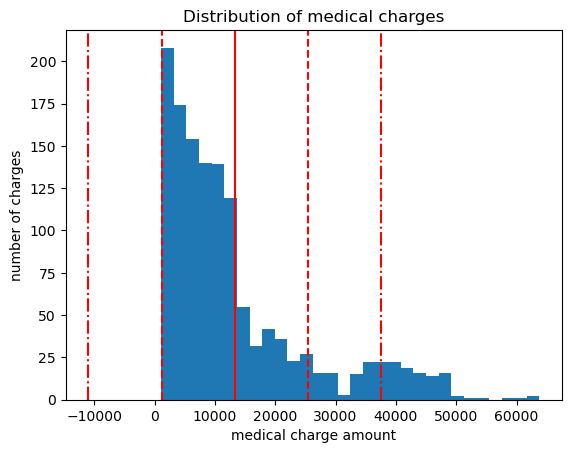

In [5]:
#plot the histogram
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('medical charge amount')
_ = plt.ylabel('number of charges')
_ = plt.title('Distribution of medical charges')
_ = plt.axvline(mean_charges, color='r')
_ = plt.axvline(mean_charges+std_charges, color='r', linestyle='--')
_ = plt.axvline(mean_charges-std_charges, color='r', linestyle='--')
_ = plt.axvline(mean_charges+(std_charges*2), color='r', linestyle='-.')
_ = plt.axvline(mean_charges-(std_charges*2), color='r', linestyle='-.')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ These data allow us to answer the question because they represent a random sample from the hospital, and the large sample size (n = 1,338) lets us rely on the Central Limit Theorem. This means the sampling distribution of the mean is approximately normal even if individual charges are skewed. The most appropriate frequentist test is a one-sample t-test comparing the mean charge to $12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator is only concerned about the mean falling below $12,000, a one-sided 95% lower confidence interval is appropriate.

In [6]:
from scipy import stats

In [7]:
#calculate the standard error
SE = std_charges / np.sqrt(len(medical))

#critical value for one-sided 95% CI
z_critical = stats.norm.ppf(0.95)

#calculate one-sided lower bound
ci_lower = mean_charges - z_critical * SE

print(f"Sample mean: {mean_charges:.2f}")
print(f"95% one-sided lower bound: {ci_lower:.2f}")

Sample mean: 13270.42
95% one-sided lower bound: 12725.86



The 95% lower bound is $12,726, which is above the 12,000 threshold. The administrator does not need to be concerned that average charges have fallen below the threshold.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ By using the pooled standard deviation, we are assuming that the population variances of the two groups are equal. This is called the homogeneity of variance assumption.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ After performing a two-sample t-test to compare charges for insured vs. uninsured patients, we found that insured and uninsured patients are charged significantly different amounts. This is because the p-value we calculated is very small (practically 0), meaning we can reject the null hypothesis (that insured and uninsured patients are charged the same). Our manual calculation of the t-stat and p-value came out the same as our calculation using scipy.stats.

In [8]:
#split data into two sets (uninsured and insured)
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

#sample sizes
n1 = len(insured)
n2 = len(uninsured)

#sample means
mean1 = insured.mean()
mean2 = uninsured.mean()

#sample standard deviations
std1 = np.std(insured, ddof=1)
std2 = np.std(uninsured, ddof=1)

In [9]:
#manual calculation of pooled standard deviation
s_p = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
s_p

np.float64(11520.034268775256)

In [10]:
#manual calculation of t-statistic
t_stat = (mean1 - mean2) / (s_p * np.sqrt(1/n1 + 1/n2))
t_stat

np.float64(11.893299030876715)

In [11]:
#manual calculation of p-value
df = n1 + n2 - 2 
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=df))
p_value

np.float64(0.0)

In [12]:
#calcuate t-stat and p-value using scipy
t_stat_scipy, p_value_scipy = stats.ttest_ind(insured, uninsured, equal_var=True)
t_stat_scipy, p_value_scipy

(np.float64(11.893299030876712), np.float64(4.461230231620717e-31))

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ SciPy does not have a dedicated one-sample z-test function. A z-test can be done manually. In practice, t-tests are used instead because the population standard deviation is usually unknown, and for large samples, the t-test approximates a z-test.






## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test